# Parsing A Directory of Angiography Data

Let us start by loading in the necessary modules

In [1]:
import sys
sys.path.append('../..')
import pymethods as pma
import pymethods.pyplot as plt
import pathlib as pt
import numpy as np
import pyvista as pv

Instantiate Folder object

In [2]:
path_angio = pt.Path(r'../../Datasets/test_1/angiography')
folder_angio = pma.parse.angiography.Folder(path_angio)

To view the files within the folder call the files object

In [3]:
# the files property is a list showing the path to all the files contained within the angiography directory
folder_angio.files[0:5]

[WindowsPath('../../Datasets/test_1/angiography/attribCurve1.data'),
 WindowsPath('../../Datasets/test_1/angiography/attribCurve2.data'),
 WindowsPath('../../Datasets/test_1/angiography/BifAnalysisInfo.data'),
 WindowsPath('../../Datasets/test_1/angiography/bifAttrib1Curve.data'),
 WindowsPath('../../Datasets/test_1/angiography/bifAttrib2Curve.data')]

to isolate all the filenames we can use the filenames property

In [4]:
folder_angio.filenames[0:5]

['attribCurve1.data',
 'attribCurve2.data',
 'BifAnalysisInfo.data',
 'bifAttrib1Curve.data',
 'bifAttrib2Curve.data']

For key files we can generate Data objects which have parsed the data files in the angiography folder.

In [5]:
print(folder_angio.bifCenterline1)
print(folder_angio.bifCenterline2)
print(folder_angio.centerline1)
print(folder_angio.centerline2)
print(folder_angio.BifCoreEllipseSetellipseSet)
print(folder_angio.CrossSectionEllipseSet1)
print(folder_angio.CrossSectionEllipseSet2)

## Data Objects

From a Data object we can view the original file path by calling the "file_path" property

In [6]:
print(folder_angio.bifCenterline1.file_path)
print(folder_angio.bifCenterline2.file_path)
print(folder_angio.centerline1.file_path)
print(folder_angio.centerline1.file_path)
print(folder_angio.BifCoreEllipseSetellipseSet.file_path)
print(folder_angio.CrossSectionEllipseSet1.file_path)
print(folder_angio.CrossSectionEllipseSet2.file_path)

..\..\Datasets\test_1\angiography\bifCenterline1.data
..\..\Datasets\test_1\angiography\bifCenterline2.data
..\..\Datasets\test_1\angiography\centerline1.data
..\..\Datasets\test_1\angiography\centerline1.data
..\..\Datasets\test_1\angiography\BifCoreEllipseSetellipseSet.data
..\..\Datasets\test_1\angiography\CrossSectionEllipseSet1.data
..\..\Datasets\test_1\angiography\CrossSectionEllipseSet2.data


There a multiple data structure types within the angiography folder, we can view which class our object is using the data_class property

In [7]:
print(folder_angio.bifCenterline1.data_class)
print(folder_angio.bifCenterline2.data_class)
print(folder_angio.centerline1.data_class)
print(folder_angio.centerline1.data_class)
print(folder_angio.BifCoreEllipseSetellipseSet.data_class)
print(folder_angio.CrossSectionEllipseSet1.data_class)
print(folder_angio.CrossSectionEllipseSet2.data_class)

LkebCurve
LkebCurve
LkebCurve
LkebCurve
LkebCurveSet
LkebCurveSet
LkebCurveSet


We can directly view the parsed data of our object with the data method

In [8]:
# NOTE __class__ is a property of an object indicating which class they come from
print(folder_angio.centerline1.data.__class__)
print(folder_angio.BifCoreEllipseSetellipseSet.data.__class__)

<class 'pymethods.arrays.Curve.Curve'>
<class 'list'>


# LkebCurve

An LkebCurve is a singular curve (normally a centerline). We have parsed the LkebCurve data into a Curve object. These objects contain methods to conveniently plot and visualize. We show how to plot a 3-dimensional scatter plot of varios degrees of opacity (alpha=?) and color (color=?). The ensure that the grid spacing is "almost" equal we apply the pma.pyplot.equal_aspect_3d() method, and finally we run the pma.pyplot.show() function to show the figure in the notebook.

To view interactive widgets install https://github.com/matplotlib/jupyter-matplotlib

In [9]:
%matplotlib widget

In [10]:
folder_angio.bifCenterline1.data.scatter3d(color='red', alpha=1)
folder_angio.bifCenterline2.data.scatter3d(color='pink', alpha=0.25)
folder_angio.centerline1.data.scatter3d(color='green', alpha=0.5)
folder_angio.centerline2.data.scatter3d(alpha=1)
pma.pyplot.equal_aspect_3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We can plot lines by using the plot3d method

In [11]:
pma.pyplot.figure_3d()
folder_angio.bifCenterline1.data.plot3d(color='red', alpha=1)
folder_angio.bifCenterline2.data.plot3d(alpha=0.25)
folder_angio.centerline1.data.plot3d(color='green', alpha=0.5)
folder_angio.centerline2.data.plot3d(alpha=1)
pma.pyplot.equal_aspect_3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We can interpolate extracted centerlines by calling the centerlines with some kind of linspace between 0 and 1. To truncate the centerline just input a linspace with an upper/lower limit [0,1]. The interpolation is perfomed using B-Splines generated from the scipy library https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html

In [12]:
plt.figure_3d()
centerline = folder_angio.centerline1.data
interp_centerline = centerline(np.linspace(0, 1, 20))
truncated_centerline = centerline(np.linspace(0, 0.5, 20))
centerline.plot3d(alpha=0.25)
interp_centerline.scatter3d(linewidth=5)
truncated_centerline.plot3d('r', linewidth=8)
pma.pyplot.equal_aspect_3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We can also show the curve frames along the centerline by calling the transport_frames method on a curve. The transport frames are calculated through the algorithm described in https://janakiev.com/blog/framing-parametric-curves/

In [13]:
plt.figure_3d()
centerline = folder_angio.bifCenterline1.data
transport_frames = centerline.transport_frames()

# NOTE: the ::2 notation means to skip eveery second basis

for frame, center in zip(transport_frames[::2,:,:], centerline.T[::2,:]):
    pma.arrays.Basis(frame).quiver3d(origin=center)
centerline.plot3d()
pma.pyplot.equal_aspect_3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# LkebCurveSet

An LkebCurveSet is a set of curves, and is normally a set of cross sections

The cross sectiondatasets are lists of FlatContour Objects

In [14]:
cross_sections = folder_angio.BifCoreEllipseSetellipseSet.data
print(cross_sections.__class__)
print(cross_sections[0].__class__)

<class 'list'>
<class 'pymethods.arrays.Curve.FlatContour'>


We can plot the cross sections by indexing an individual cross section from an ellipse and calling the convenience functions

In [15]:
plt.figure_3d()
cross_sections[0].scatter3d()
cross_sections[0].plot3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Contours inherit from the Curve class and like the centerlines they can be interpolated and truncated

In [16]:
plt.figure_3d()
# start of section 
cross_sections[0][:,0].scatter3d(color='green')
# interpolated curve
cross_sections[0](np.linspace(0,1,100)).plot3d()
# as we do not want to close the curve we must set the close option to False
cross_sections[0](np.linspace(0,0.5,100), close=False)[:,0:-1].plot3d()
# end of section 
cross_sections[0](np.linspace(0,0.5,100), close=False)[:,-1].scatter3d(color='red')
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We can extract information about our contour such as the centroid and basis

In [17]:
plt.figure_3d()
contour = folder_angio.BifCoreEllipseSetellipseSet.data[0]

centroid = contour.centroid

basis = contour.calc_basis()
normal = contour.get_normal()

contour.plot3d()
basis.quiver3d(origin=centroid)
normal.quiver3d(origin=centroid, color='red')
centroid.scatter3d()
pma.pyplot.equal_aspect_3d()
pma.pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Plotting the Tree

We can now also plot the extracted portions of the coronary tree

In [18]:
plt.figure_3d()
folder_angio.bifCenterline1.data.plot3d()
folder_angio.bifCenterline2.data.plot3d()
for section in folder_angio.CrossSectionEllipseSet1.data:
    section.plot3d(color='r', linewidth=0.5)
for section in folder_angio.CrossSectionEllipseSet2.data:
    section.plot3d(color='g', linewidth=0.5)
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We observe that the surfaces not meshable for CFD just yet

# Smoothing the surfaces

As the data is not smooth it will be difficult to generate a surface, thus the easiest way to generate the surface is to reinterpolate our surfaces and smooth

In [19]:
centerline = folder_angio.bifCenterline1.data
contours = folder_angio.CrossSectionEllipseSet1.data

In [20]:
plt.figure_3d()
centerline.plot3d()
[contour.plot3d('b', alpha=0.4) for contour in contours]
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Let us first create a surface object from our list of contours. This object has smoothing, interpolation and plotting methods which we can use for conveniently constructing our surface

In [21]:
artery_surface = pma.arrays.structured.CylindricalSurface.from_contours(contours)
plt.figure_3d()
artery_surface.plot3d()
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Observe that we need to reparameterize the curve in order to maintain 'flat' contours when interpolating. 

In [22]:
plt.figure_3d()

interp_a = artery_surface.interpolate_long(100)
interp_b = artery_surface.interpolate_long(100, reparam_curve=centerline.s_frac)
# the interpolations which aren't reparameterized
interp_a.plot3d(color='red')
# the interpolations which are reparameterized by the centerline
interp_b.plot3d()

plt.equal_aspect_3d_centered(interp_b.mean(-1).mean(-1))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
p = pv.BackgroundPlotter()
p.add_mesh(interp_b.to_vtk())
p.show()

Observe that the mesh generated is still not very good. Thus we must apply filters and interpolate the contours, closing the gap. Filtering is performed via savitzy-golay filtering https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter and contour interpolation is performed in the same manner as the Contour class.

In [24]:
interp_b = interp_b.filter(window_size=15)
                           
p = pv.BackgroundPlotter()
p.add_mesh(interp_b.to_vtk())
p.show()

# significantly better. interpolate around the contour to close the surface

interp_b = interp_b.interpolate_contours(100)

p = pv.BackgroundPlotter()
p.add_mesh(interp_b.to_vtk())
p.show()

# Cutting Centerlines

Let us say we wish to cut the centerline at a fixed distance perpendicular to another centerline. We will need to solve an optimiztion problem which searches for the correct perpendicular distance

In [25]:
plt.close('all')
plt.figure_3d()

centerline1 = folder_angio.bifCenterline1.data
centerline2 = folder_angio.bifCenterline2.data

# The distance is the distance desired between the two points whilst the resolution is the is the error on the centerline
point_pairs = centerline1.findPointPairsAtPerpendicularDistance(centerline2, distance=0.01, resolution=0.001)

p1 = point_pairs['on_main']
p2 = point_pairs['on_input']

centerline1.plot3d('r')
centerline2.plot3d('b')
p1.scatter3d(color='red')
p2.scatter3d(color='blue')

pma.arrays.Vectorspace(np.stack([p1, p2], -1)).plot3d()
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Clipping the Bifurcation

Let us say we wish to clip our bifurcation such that we extract only the desired contours. We can essentilly just index using the our bifurcation contours

In [26]:
i_clip = np.argmin(np.linalg.norm(centerline2 - p2[:, None], axis=0))
main_surface = pma.arrays.structured.CylindricalSurface.from_contours(folder_angio.CrossSectionEllipseSet1.data)
bif_surface = pma.arrays.structured.CylindricalSurface.from_contours(folder_angio.CrossSectionEllipseSet2.data[i_clip:])


In [27]:
plt.figure_3d()
main_surface.plot3d()
bif_surface.plot3d(color='red')
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Merging two Surfaces

Merging two surface/volumes must at the moment be performed in an external software. However it is easy to generate the required surfaces. These surfaces can then be exported into CAD converted into volumes and combined.

In [28]:
# generating the main vessel
main_surface = main_surface.interpolate_long(200, reparam_curve=centerline1.s_frac)
main_surface = main_surface.filter(window_size=15)
main_surface = main_surface.interpolate_contours(100)
plt.figure_3d()
main_surface.plot3d()
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
# generating the bifurcation vessel
plt.figure_3d()
bif_surface = bif_surface.filter(window_size=15)
bif_surface = bif_surface.interpolate_contours(100)
bif_surface = bif_surface.interpolate_long(200)
bif_surface = bif_surface.filter(window_size=15)
bif_surface = bif_surface.interpolate_contours(100)

bif_surface.plot3d()
plt.equal_aspect_3d()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The meshes can now be exported and combined and meshed in an external program

In [30]:
p = pv.BackgroundPlotter()
main_vtk = main_surface.to_vtk()
bif_vtk = bif_surface.to_vtk()
main_vtk.save("main_surface.vtk")
bif_vtk.save("bif_surface.vtk")
p.add_mesh(main_vtk)
p.add_mesh(bif_vtk)
p.show()
# save the vtks then import them into solidworks or a similar software

# High Level Reconstruction

We provide a high level construction API to quickly construct the surfaces

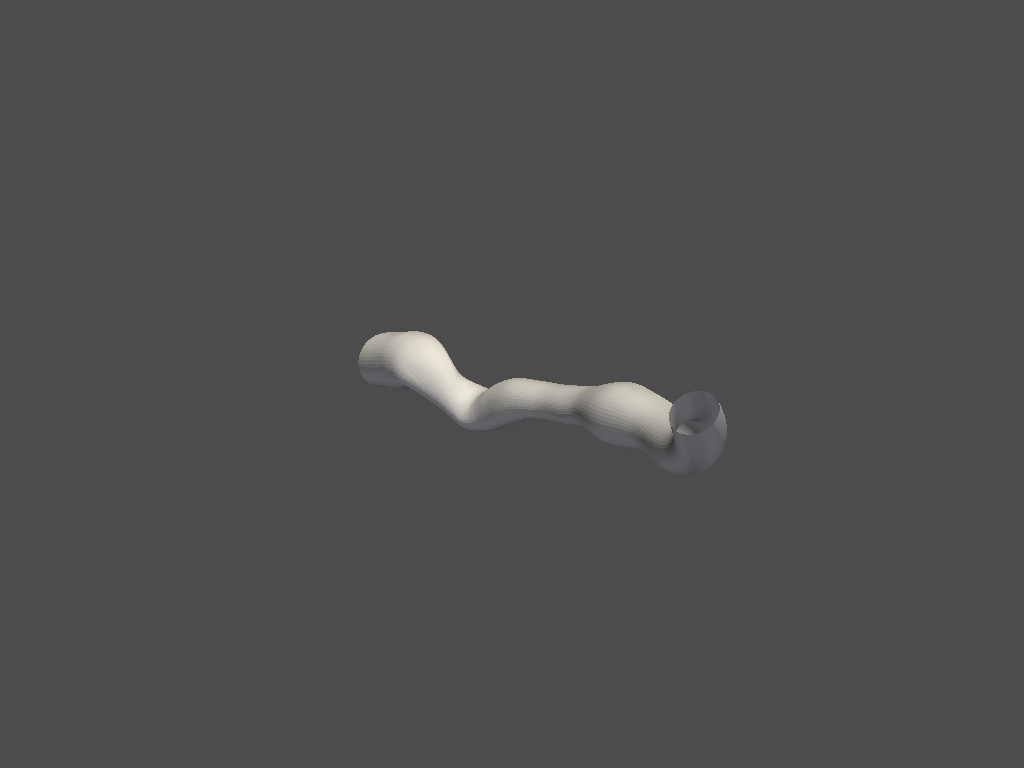

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [31]:
mainVesselConstructor = pma.construct.angiography.vessel.Main(
    path_angio
)
mainVessel = mainVesselConstructor.construct(window_size=25)
mainVessel.to_vtk().plot()

In [48]:
bifVesselConstructor = pma.construct.angiography.vessel.Bifur(
    path_angio
)
bifVessel = bifVesselConstructor.construct(window_size=25)
# bifVessel.to_vtk().plot()
main_vtk.save("main_surface.vtk")


main_centerline = mainVessel.get_centerline()
bif_centerline  = bifVessel.get_centerline()

point_pairs = main_centerline.findPointPairsAtPerpendicularDistance(bif_centerline, distance=0.01, resolution=0.001)
p1 = point_pairs['on_main']
p2 = point_pairs['on_input']

i_clip = np.argmin(np.linalg.norm(bif_centerline - p2[:, None], axis=0))

bifVessel = bifVessel[:, :, i_clip:]
mainVessel.to_vtk().save("main_surface.vtk")
bifVessel.to_vtk().save("bif_surface.vtk")
np.save("main_surface", mainVessel)
np.save("bif_surface", bifVessel)

IndexError: too many indices for array

In [49]:
bif_centerline.shape


(3, 200)

# Calculating Normals and curvature

The curvature calculations are only implemented for column matrices. We can convert our structured surface to a column matrix using the following method

In [33]:
mainVessel_columnMatrix = mainVessel.toColumnSurface()
print(mainVessel_columnMatrix.shape)

(3, 10000)


In [34]:
principle_curvatures, min_curvature_principle_directions = mainVessel_columnMatrix.compute_principle_curvatures(n_processors=5)

In [35]:
print(principle_curvatures.shape)
print(min_curvature_principle_directions.shape)

(2, 10000)
(10000, 3, 2)


In [36]:
mainVessel_vtk = mainVessel_columnMatrix.to_vtk(includeNormals=True, includeCurvature=True, structuredShape=mainVessel.shape)

In [37]:
mainVessel.shape

(3, 50, 200)

Plot the points

In [38]:
#maximum_curvature, minimum_curvature, gaussian_curvature, mean_curvature
p = pv.BackgroundPlotter()
p.add_mesh(mainVessel_vtk, scalars="maximum_curvature")
p.show()

Plot the glyphs

In [39]:
p = pv.BackgroundPlotter()
p.add_mesh(mainVessel_vtk.arrows)
p.show()

We can apply a delaunay triangulation

In [40]:
# main_vessel_triangulated = mainVessel_vtk.delaunay_2d() # can play around with pyvista parameters to obtain triangulations

Or we can generate a structured grid by reconstructing the structured shape

In [41]:
mainVessel_curvatures_and_normals = mainVessel_columnMatrix.to_vtk(
            includeNormals=sTrue, includeCurvature=True,
            structuredShape=mainVessel.shape)
p = pv.BackgroundPlotter()
p.add_mesh(mainVessel_curvatures_and_normals, scalars='minimum_curvature')
p.show()

NameError: name 'sTrue' is not defined

In [42]:
p = pv.BackgroundPlotter()
p.add_mesh(mainVessel_curvatures_and_normals.arrows, scalars='minimum_curvature')
p.show()

NameError: name 'mainVessel_curvatures_and_normals' is not defined

In [43]:
mainVessel.shape

(3, 50, 200)